In [ ]:
!pip install pillow

In [ ]:
!pip install opencv-python

In [ ]:
!apt-get update
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python --upgrade

In [1]:
import cv2

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [6]:
base_dir = "/data/severstal-steel-defect-detection/"

In [7]:
train_df = pd.read_csv('{}train.csv'.format(base_dir))

In [8]:
train_df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [9]:
tmp = train_df.ImageId_ClassId.str.split('_')

In [10]:
train_df['ImageId'] = [t[0] for t in tmp]

In [11]:
train_df['ClassId'] = [t[1] for t in tmp]

In [12]:
train_df = train_df.drop('ImageId_ClassId',axis=1)

In [13]:
train_df.head()

,EncodedPixels,ImageId,ClassId
0,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,NaN,0002cc93b.jpg,2
2,NaN,0002cc93b.jpg,3
3,NaN,0002cc93b.jpg,4
4,NaN,00031f466.jpg,1


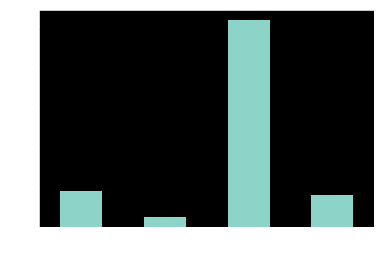

In [14]:
train_df[~pd.isnull(train_df.EncodedPixels)].groupby('ClassId').size().plot(kind='bar')

In [15]:
classes_per_image = train_df[~pd.isnull(train_df.EncodedPixels)].groupby('ImageId').size().to_frame('ClassesPresent').reset_index()

In [16]:
nice_train = train_df.pivot(index='ImageId',columns='ClassId',values='EncodedPixels').reset_index()
nice_train.columns = ['ImageId','C1_Pixels','C2_Pixels','C3_Pixels','C4_Pixels']

In [17]:
nice_train.columns = ['ImageId','Defect_1','Defect_2','Defect_3','Defect_4']

In [18]:
nice_train.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN
1,00031f466.jpg,NaN,NaN,NaN,NaN
2,000418bfc.jpg,NaN,NaN,NaN,NaN
3,000789191.jpg,NaN,NaN,NaN,NaN
4,0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN


In [19]:
nice_train = pd.merge(nice_train,classes_per_image, on='ImageId', how='left')

In [20]:
nice_train.ClassesPresent = nice_train.ClassesPresent.fillna(0).astype(int)

In [21]:
nice_train.head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4,ClassesPresent
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
1,00031f466.jpg,NaN,NaN,NaN,NaN,0
2,000418bfc.jpg,NaN,NaN,NaN,NaN,0
3,000789191.jpg,NaN,NaN,NaN,NaN,0
4,0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1


In [22]:
nice_train[nice_train.ClassesPresent>1].head()

,ImageId,Defect_1,Defect_2,Defect_3,Defect_4,ClassesPresent
11,0025bde0c.jpg,NaN,NaN,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...,315139 8 315395 15 315651 16 315906 17 316162 ...,2
14,002fc4e19.jpg,146021 3 146275 10 146529 40 146783 46 147038 ...,145658 7 145901 20 146144 33 146386 47 146629 ...,NaN,NaN,2
34,008ef3d74.jpg,356336 4 356587 11 356838 18 357089 25 357340 ...,375439 5 375687 14 375935 24 376182 34 376430 ...,NaN,NaN,2
37,00ac8372f.jpg,101742 3 101998 12 102253 19 102301 22 102509 ...,98114 24 98370 72 98626 119 98881 168 99137 19...,NaN,NaN,2
44,00c88fed0.jpg,10474 7 10728 15 10983 18 11239 21 11494 24 11...,13428 8 13684 24 13940 39 14196 55 14452 71 14...,NaN,NaN,2


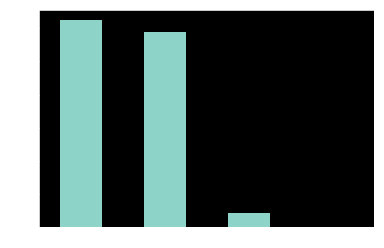

In [23]:
nice_train.ClassesPresent.value_counts().plot(kind='bar')

In [24]:
nice_train.ClassesPresent.value_counts()

1    6239
0    5902
2     425
3       2
Name: ClassesPresent, dtype: int64

# Plotting

In [25]:
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]

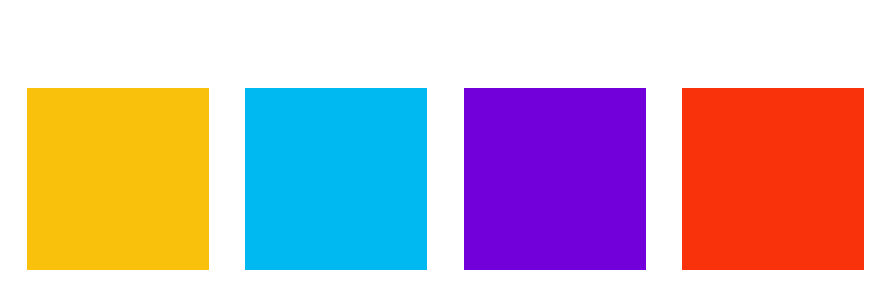

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50, 50, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title("Defect Color: {}".format(i+1))
fig.suptitle("Each Defect Color")

plt.show()

In [27]:
def create_mask(label):
    
    mask_label = np.zeros(1600*256, dtype=np.uint8)
    
    label = label.split()
    
    positions = map(int, label[0::2])
    length = map(int, label[1::2])
    
    for pos, le in zip(positions, length):
        mask_label[pos:(pos+le)] = 1

    mask = mask_label.reshape(256, 1600, order='F')
    return mask

In [28]:
def show_image(imageid):
    
    img = cv2.imread('/data/severstal-steel-defect-detection/train_images/{}'.format(imageid))
    fig, ax = plt.subplots(figsize=(15, 15))
    
    for defect in range(1,5):
        label = nice_train.loc[nice_train.ImageId==imageid,'Defect_{}'.format(defect)].values[0]
        if not pd.isnull(label):
            mask = create_mask(label)
            contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
            for c in contours:
                cv2.polylines(img, c, True, palet[defect-1], 4)

    ax.imshow(img)
    plt.title(imageid)

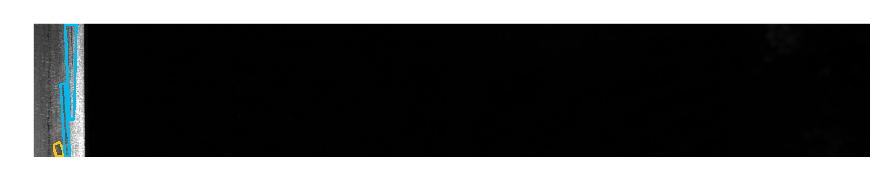

In [29]:
show_image('00c88fed0.jpg')

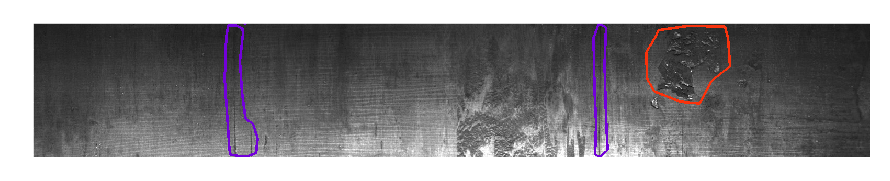

In [60]:
show_image(np.random.choice(nice_train.ImageId.values))

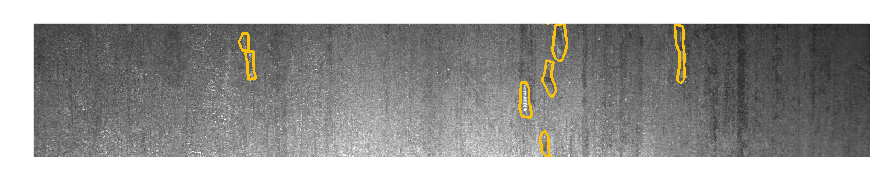

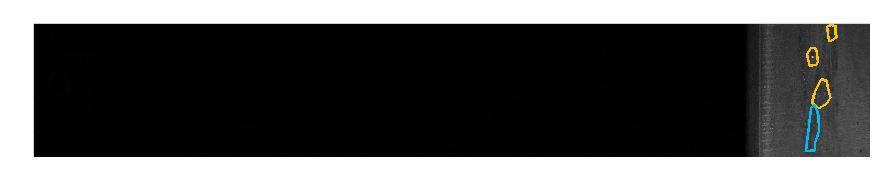

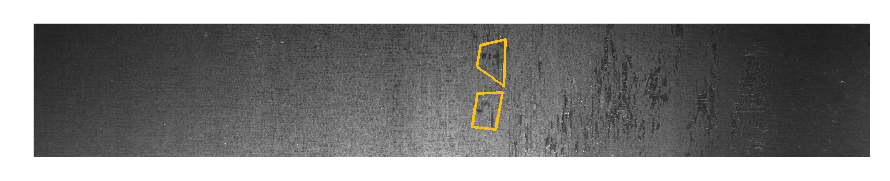

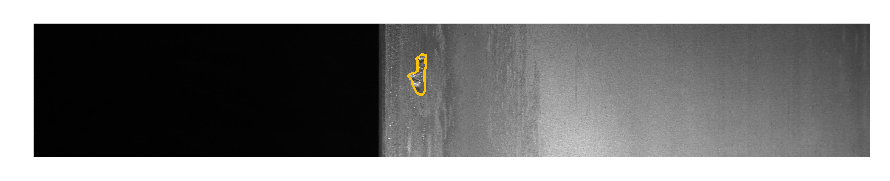

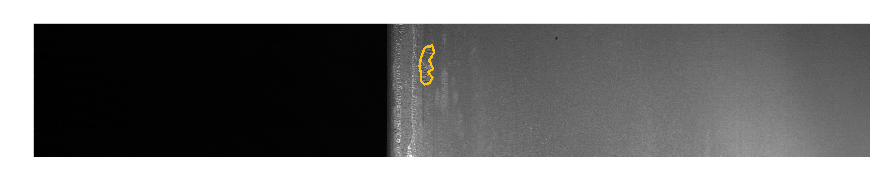

In [64]:
for img_id in np.random.choice(nice_train.loc[~pd.isnull(nice_train.Defect_1),'ImageId'],5):
    show_image(img_id)

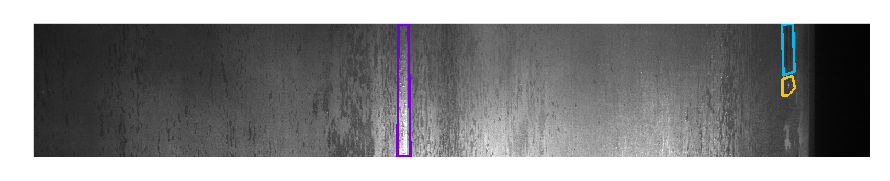

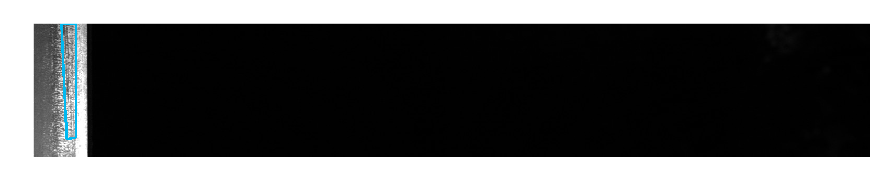

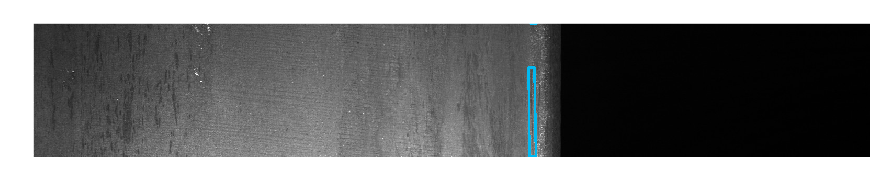

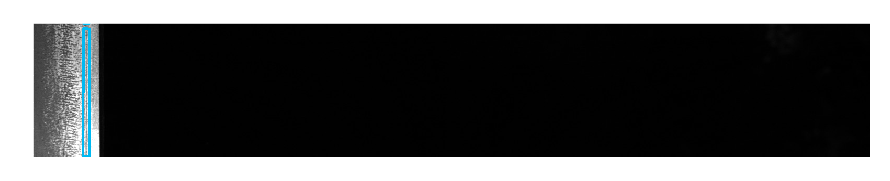

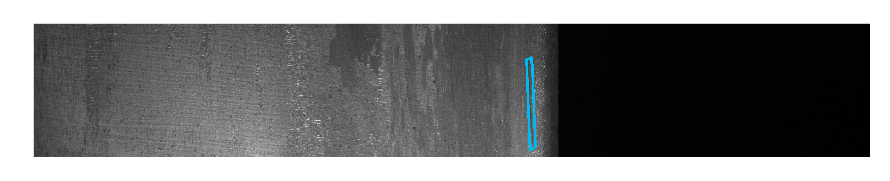

In [65]:
for img_id in np.random.choice(nice_train.loc[~pd.isnull(nice_train.Defect_2),'ImageId'],5):
    show_image(img_id)

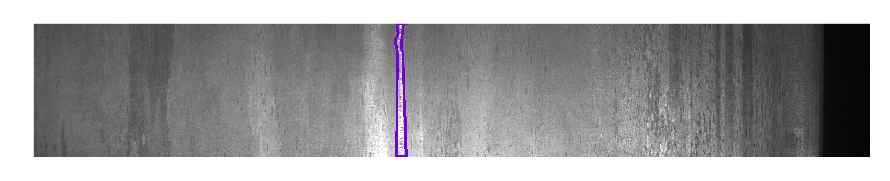

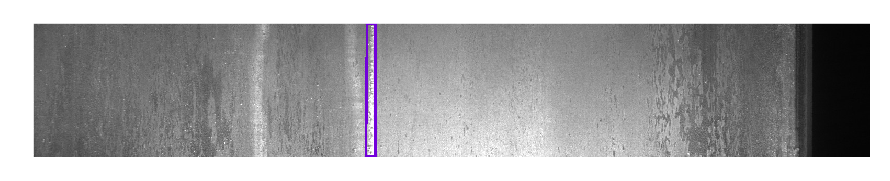

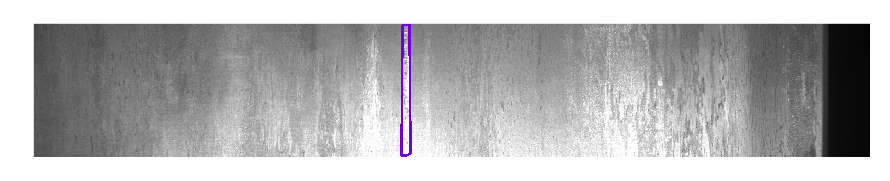

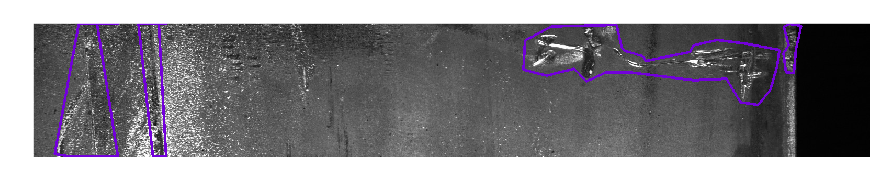

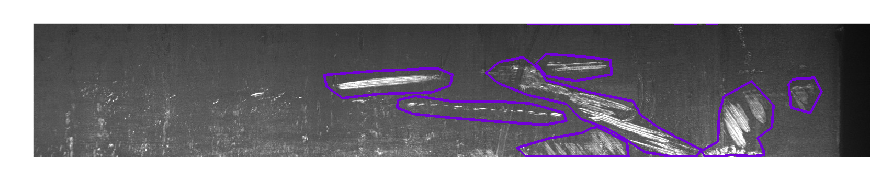

In [66]:
for img_id in np.random.choice(nice_train.loc[~pd.isnull(nice_train.Defect_3),'ImageId'],5):
    show_image(img_id)

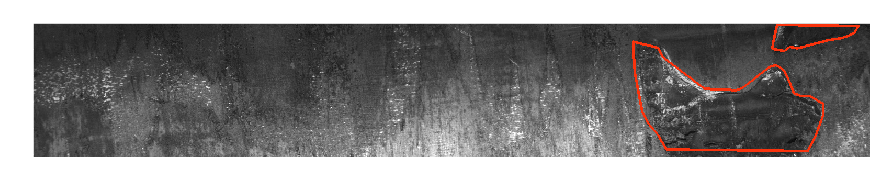

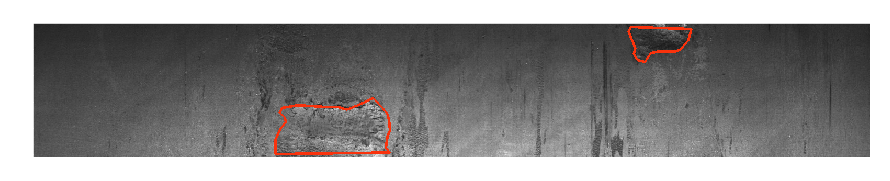

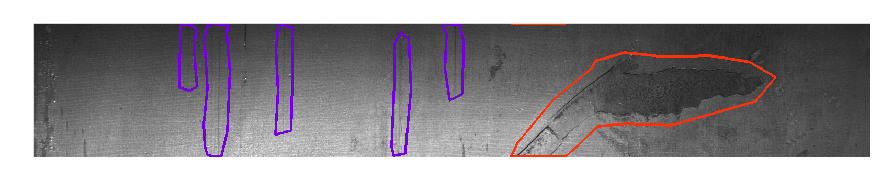

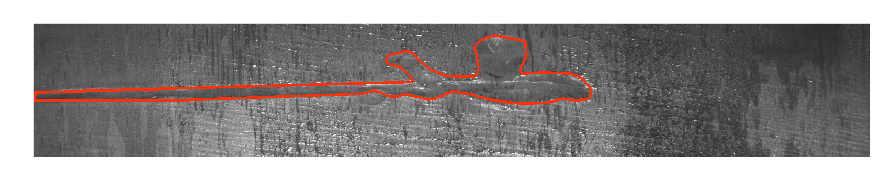

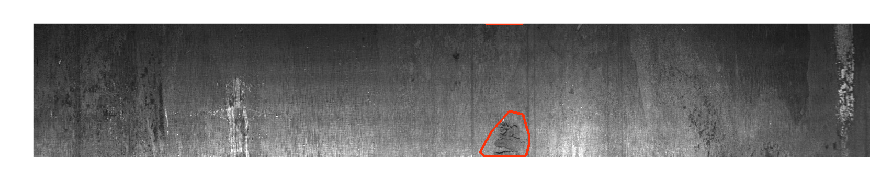

In [67]:
for img_id in np.random.choice(nice_train.loc[~pd.isnull(nice_train.Defect_4),'ImageId'],5):
    show_image(img_id)